<a href="https://colab.research.google.com/github/B-MEbrahim/DL/blob/main/IMDB/IMDB_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import imdb

In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [ ]:
import numpy as np

def vectorize_sequence(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1.
  return results

In [ ]:
X_train = vectorize_sequence(train_data)
X_test = vectorize_sequence(test_data)

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = keras.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
X_val = X_train[:10000]
X_train_par = X_train[10000:]
y_val = y_train[:10000]
y_train_par = y_train[10000:]

In [ ]:
history = model.fit(X_train_par, y_train_par,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.6963 - loss: 0.5772 - val_accuracy: 0.8702 - val_loss: 0.3575
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.8954 - loss: 0.3070 - val_accuracy: 0.8828 - val_loss: 0.3017
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9281 - loss: 0.2177 - val_accuracy: 0.8724 - val_loss: 0.3132
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9412 - loss: 0.1770 - val_accuracy: 0.8813 - val_loss: 0.2956
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.9506 - loss: 0.1457 - val_accuracy: 0.8861 - val_loss: 0.2844
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9611 - loss: 0.1183 - val_accuracy: 0.8772 - val_loss: 0.3145
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9713 - loss: 0.0966 - val_accuracy: 0.8844 - val_loss: 0.3105
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9778 - loss: 0.0812 - val_accuracy: 0.8779 - v

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history, loss_func):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_title("Loss")
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel(loss_func)
  ax1.legend()
  ax1.grid(True)


  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_title("Accuracy")
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)
  ax2.legend()
  plt.show()

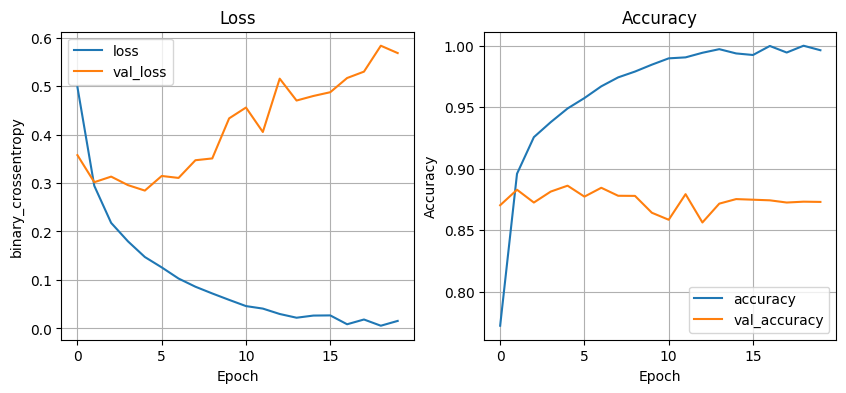

In [ ]:
plot_history(history, 'binary_crossentropy')